# Clean ESEC
Here, we will remove useless columns in the new ESEC with only avalanche events

In [1]:
import catalog

catalog.display_parameters()

## First, load the new catalog

In [2]:
ESEC_avalanches = catalog.load("catalog/1_ESEC_avalanches_180.pickle")

## Distribution of columns

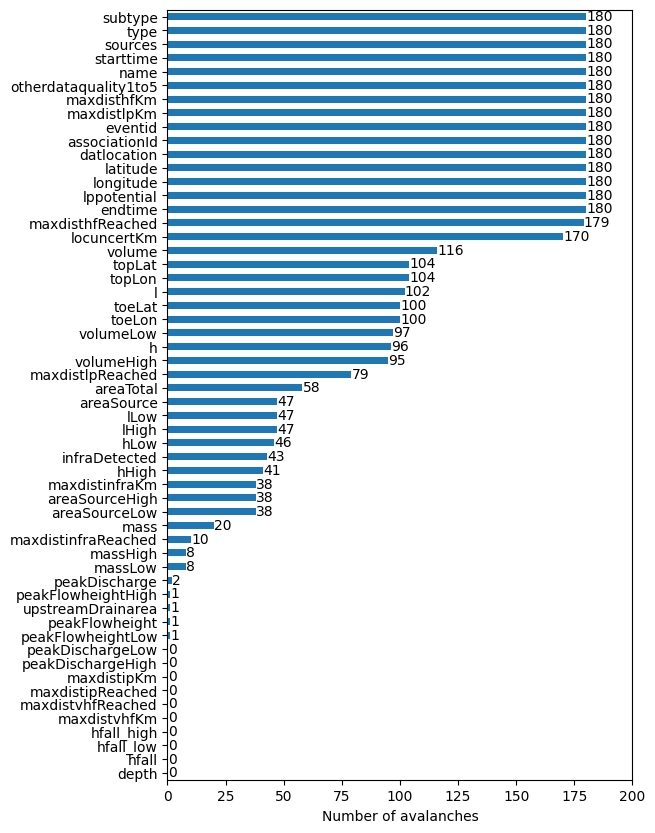

In [3]:
catalog.open_plot(ESEC_avalanches, pos_number=0.260, xlim=200)

## Delete empty columns

We can see in the previous figure that we have many columns without values. We don't need these columns, so let's remove them :

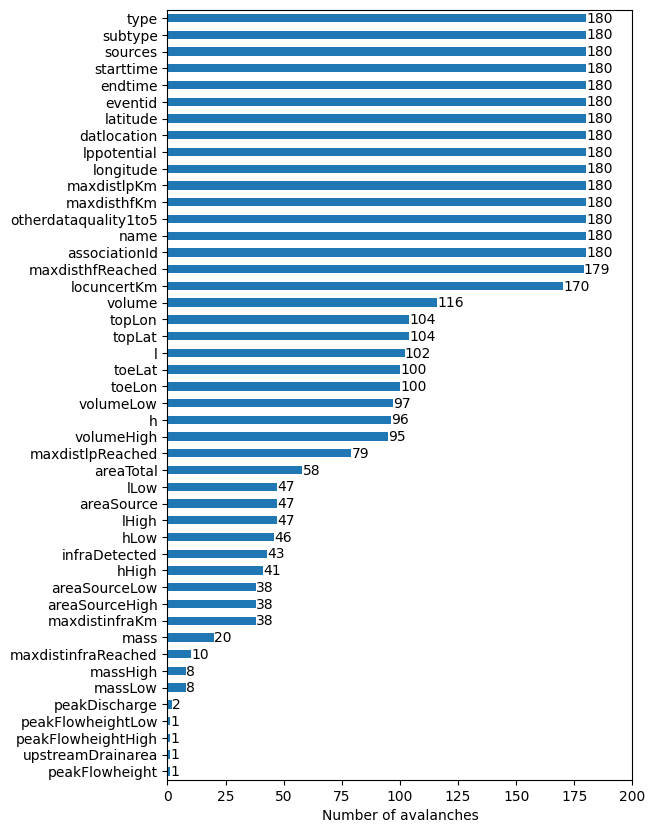

In [4]:
## Drop all columns that contain only NaN values
ESEC_avalanches = ESEC_avalanches.dropna(axis=1, how="all")

catalog.open_plot(ESEC_avalanches, pos_number=0.260, xlim=200)

## Removing useless columns

Many columns are not useful in this study. Let's remove them :

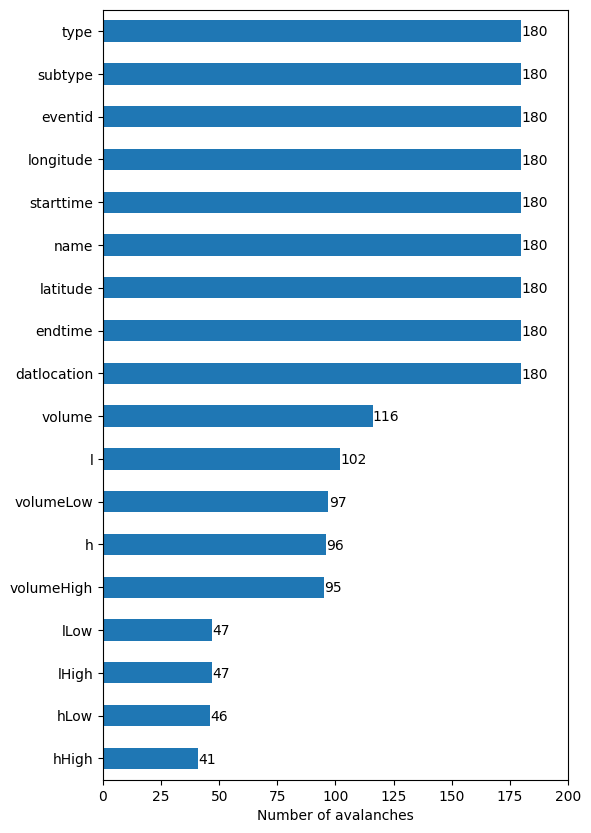

In [5]:
useless_columns = ['areaSource', 'areaSourceHigh', 'areaSourceLow', 'areaTotal', 'associationId', 'infraDetected', 'locuncertKm', 
                   'lppotential', 'mass', 'massHigh', 'massLow', 'maxdisthfKm', 'maxdisthfReached', 'maxdistlpKm', 'maxdistlpReached', 
                   'maxdistinfraKm','maxdistinfraReached', 'otherdataquality1to5', 'peakDischarge', 'peakFlowheight', 'peakFlowheightLow',
                   'peakFlowheightHigh', 'sources', 'toeLat', 'toeLon','topLat', 'topLon', 'upstreamDrainarea']

## Remove all columns in "useless_columns"
ESEC_avalanches = ESEC_avalanches.drop(useless_columns, axis=1)

catalog.open_plot(ESEC_avalanches, pos_number=0.115, xlim=200)

## Rename columns for better understanding

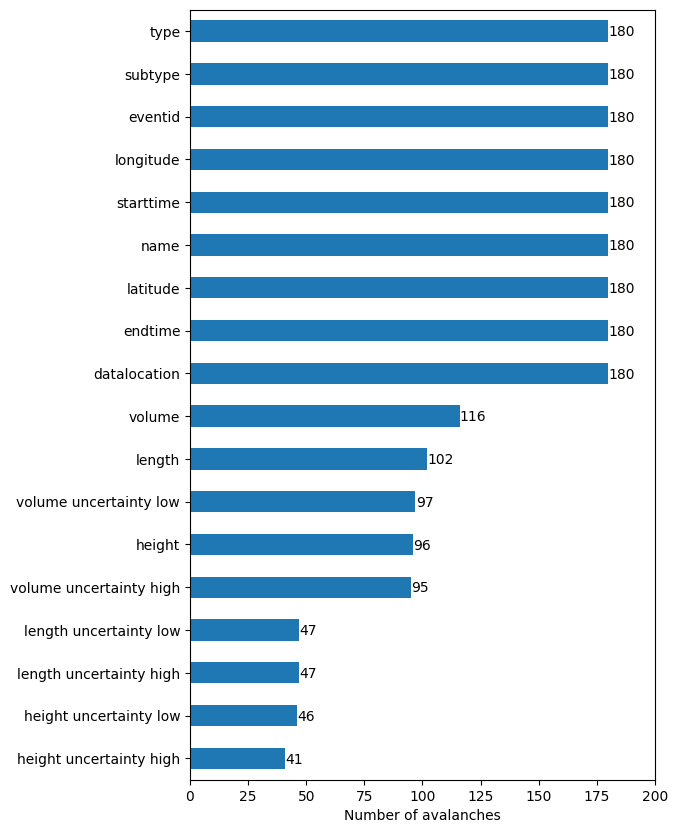

In [6]:
ESEC_avalanches = ESEC_avalanches.rename(columns={"l": "length"})
ESEC_avalanches = ESEC_avalanches.rename(columns={"h": "height"})
ESEC_avalanches = ESEC_avalanches.rename(columns={"datlocation": "datalocation"})
ESEC_avalanches = ESEC_avalanches.rename(columns={"volumeLow": "volume uncertainty low"})
ESEC_avalanches = ESEC_avalanches.rename(columns={"volumeHigh": "volume uncertainty high"})
ESEC_avalanches = ESEC_avalanches.rename(columns={"hLow": "height uncertainty low"})
ESEC_avalanches = ESEC_avalanches.rename(columns={"hHigh": "height uncertainty high"})
ESEC_avalanches = ESEC_avalanches.rename(columns={"lLow": "length uncertainty low"})
ESEC_avalanches = ESEC_avalanches.rename(columns={"lHigh": "length uncertainty high"})

catalog.open_plot(ESEC_avalanches, pos_number=0.115, xlim=200)

## How many events have volume, length and height measurements ? Let's see :

88 events have volume, length and height measurements. We will work with these.


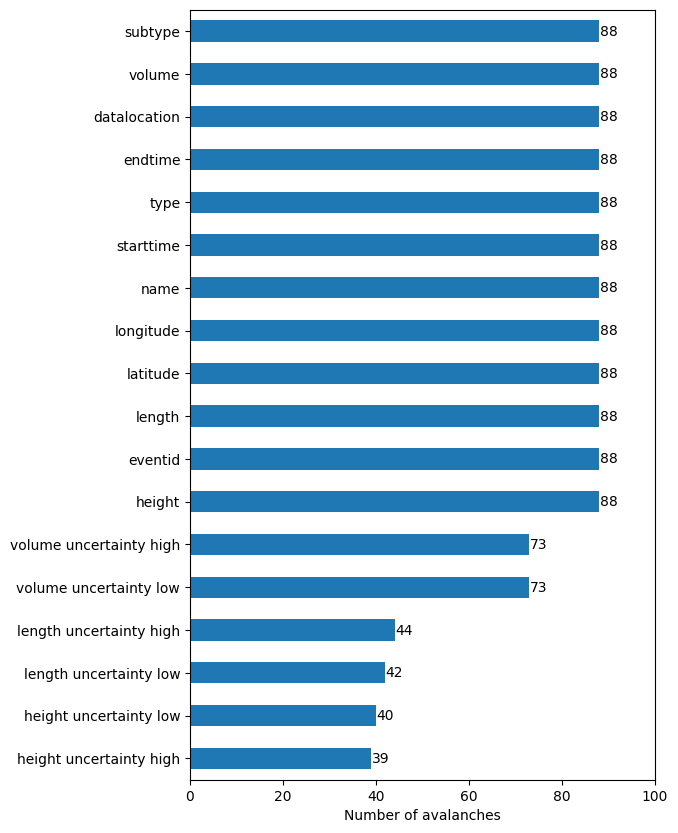

In [7]:
## Delete all events that do not have a measure in these 3 columns
ESEC_avalanches = ESEC_avalanches[ESEC_avalanches[['length', 'height', 'volume']].notnull().all(axis=1)]

print(len(ESEC_avalanches), "events have volume, length and height measurements. We will work with these.")

catalog.open_plot(ESEC_avalanches, 0.100)

ESEC_avalanches.to_pickle("catalog/2_ESEC_avalanches_88.pickle") ## Save the new catalog